In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/Admin/Desktop/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

([<matplotlib.axis.XTick at 0x1972da3b490>,
 [Text(0, 0, 'Normal'), Text(1, 0, 'Fraud')])

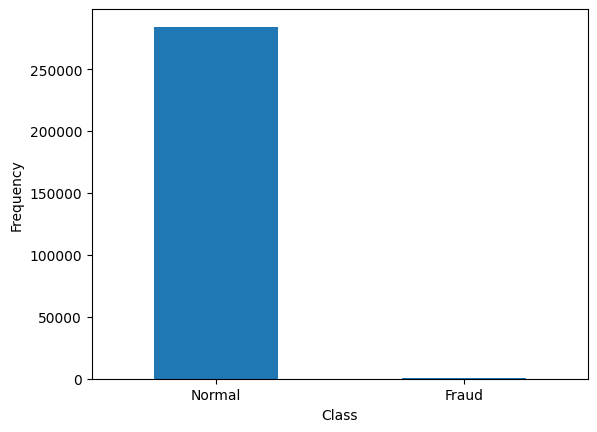

In [4]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.xlabel('Class')
plt.ylabel('Frequency')
LABELS = ["Normal", "Fraud"]
plt.xticks(range(2), LABELS)

In [5]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

In [6]:
print(fraud.shape,
normal.shape)

(492, 31) (284315, 31)


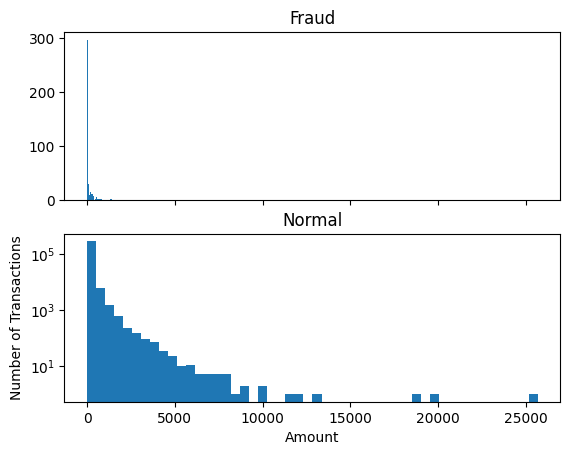

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
ax1.hist(fraud.Amount, bins = 50)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = 50)
ax2.set_title('Normal')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [8]:
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]
fraction = len(Fraud)/float(len(Valid))

print(fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

0.0017304750013189597
Fraud Cases : 492
Valid Cases : 284315


In [9]:
columns = data.columns.tolist()
columns = [i for i in columns if i not in ['Class']]
target = "Class"
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low = 0, high = 1, size = (X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [10]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.5, random_state =123)
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)

In [12]:
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [16:31<00:00, 34.19s/it] 

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.98               0.93     0.93      0.99   
GaussianNB                         0.98               0.91     0.91      0.99   
XGBClassifier                      1.00               0.90     0.90      1.00   
ExtraTreesClassifier               1.00               0.90     0.90      1.00   
KNeighborsClassifier               1.00               0.90     0.90      1.00   
RandomForestClassifier             1.00               0.90     0.90      1.00   
BaggingClassifier                  1.00               0.90     0.90      1.00   
PassiveAggressiveClassifier        1.00               0.89     0.89      1.00   
Perceptron                         1.00               0.89     0.89      1.00   
LinearDiscriminantAnalysis         1.00               0.89     0.89      1.00   
NearestCentroid             

In [44]:
from sklearn.linear_model import SGDClassifier

In [45]:
classifiers = SGDClassifier(loss='squared_hinge',alpha=0.0001, shuffle=True, verbose=0, random_state=state)

In [46]:
from sklearn.metrics import classification_report, accuracy_score

In [47]:
n_outliers = len(Fraud)
pred = classifiers.fit(X,Y)
scores_prediction = classifiers.decision_function(X)
y_pred = classifiers.predict(X)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()
print("Accuracy Score :",accuracy_score(Y,y_pred))
print()
print("Classification Report :")
print(classification_report(Y,y_pred))

Accuracy Score : 0.9982725143693799

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807

